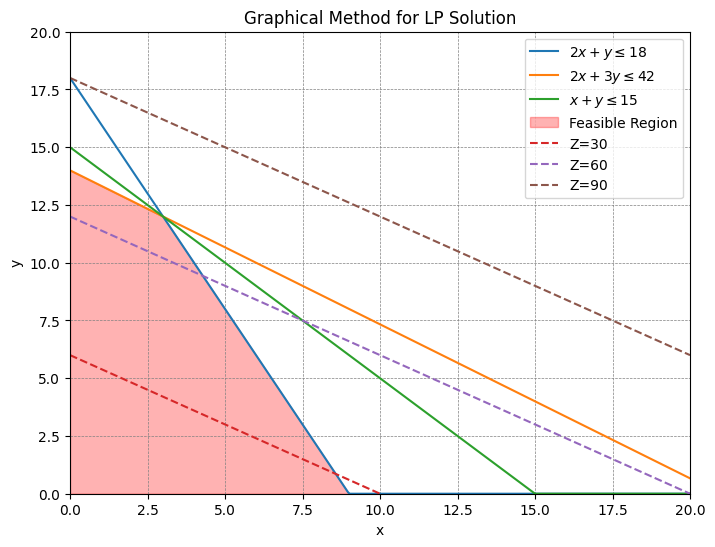

In [1]:
import numpy as np
import matplotlib.pyplot as plt


"""
MAXIMIZE 
            Z=3x+5y
SUBJECT TO

            2x+y≤18
            2x+3y≤42
            x+y≤15
            x≥0,y≥0 (non-negativity constraints)
"""
# Define the constraints
x = np.linspace(0, 20, 400)

# Constraint 1: 2x + y <= 18 → y = 18 - 2x
y1 = 18 - 2 * x

# Constraint 2: 2x + 3y <= 42 → y = (42 - 2x) / 3
y2 = (42 - 2 * x) / 3

# Constraint 3: x + y <= 15 → y = 15 - x
y3 = 15 - x

# Feasibility conditions (non-negative)
y1 = np.clip(y1, 0, None)
y2 = np.clip(y2, 0, None)
y3 = np.clip(y3, 0, None)

# Plot the constraints
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label=r'$2x + y \leq 18$')
plt.plot(x, y2, label=r'$2x + 3y \leq 42$')
plt.plot(x, y3, label=r'$x + y \leq 15$')

# Shade the feasible region
plt.fill_between(x, np.minimum(np.minimum(y1, y2), y3), 0, color='red', alpha=0.3, label='Feasible Region')

# Labels and legends
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.title('Graphical Method for LP Solution')

# Plot the objective function (Z = 3x + 5y)
# Example level curves of the objective function
for z in [30, 60, 90]:
    y_obj = (z - 3 * x) / 5
    plt.plot(x, y_obj, linestyle='--', label=f'Z={z}')

plt.legend()
plt.show()


In [2]:
print(" 400 generated possible values of x with the interval of 0 to 20")
print(x)

 400 generated possible values of x with the interval of 0 to 20
[ 0.          0.05012531  0.10025063  0.15037594  0.20050125  0.25062657
  0.30075188  0.35087719  0.40100251  0.45112782  0.50125313  0.55137845
  0.60150376  0.65162907  0.70175439  0.7518797   0.80200501  0.85213033
  0.90225564  0.95238095  1.00250627  1.05263158  1.10275689  1.15288221
  1.20300752  1.25313283  1.30325815  1.35338346  1.40350877  1.45363409
  1.5037594   1.55388471  1.60401003  1.65413534  1.70426065  1.75438596
  1.80451128  1.85463659  1.9047619   1.95488722  2.00501253  2.05513784
  2.10526316  2.15538847  2.20551378  2.2556391   2.30576441  2.35588972
  2.40601504  2.45614035  2.50626566  2.55639098  2.60651629  2.6566416
  2.70676692  2.75689223  2.80701754  2.85714286  2.90726817  2.95739348
  3.0075188   3.05764411  3.10776942  3.15789474  3.20802005  3.25814536
  3.30827068  3.35839599  3.4085213   3.45864662  3.50877193  3.55889724
  3.60902256  3.65914787  3.70927318  3.7593985   3.80952381

In [3]:

#  SOLVING USING THE LINPROG FUNCTION FROM SCIPY LIBRARY FOR SIMPLEX METHOD
from scipy.optimize import linprog

# Coefficients of the objective function (to maximize, use -ve of coefficients)
c = [-3, -5]

# Coefficients for constraints
A = [[2, 1], [2, 3], [1, 1]]
b = [18, 42, 15]

# Bounds for variables
x_bounds = (0, None)
y_bounds = (0, None)

# Solve the problem using linprog
result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')

# Print the optimal solution
print(f"Optimal solution: x = {result.x[0]:.2f}, y = {result.x[1]:.2f}")
# FEASIBLE SOLUTION all possible solutions
# Print the value of the objective function at the optimal point
print(f"Maximum Z value: {-result.fun:.2f}")


Optimal solution: x = 0.00, y = 14.00
Maximum Z value: 70.00
